In [1]:
!python -m pip install pillow numpy matplotlib

You should consider upgrading via the 'c:\Users\leon1\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [43]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

PATH ="C:/Users/leon1/Documents/Research Repo/Experiments/Ethnicity FL paper/Datasets/raw/federalized_brazilian_faces_dataset/federalized/"
images = glob.glob(PATH + "/**/*.jpg", recursive=True)
vecs = []

def get_class(filename):
    if "BRANCA" in filename:
        return 0
    elif "PARDA" in filename:
        return 1
    elif "PRETA" in filename:
        return 2
    else:
        return -1

print(len(images))
for filename in images:

    img = Image.open(filename)
    img = img.convert("L")
    pix = img.resize((1,1))
    pix = np.array(pix)


    vecs.append((get_class(filename), np.linalg.norm(pix)))

210322


In [44]:
vecs_whites = [x for x in vecs if x[0] == 0]
vecs_mixed = [x for x in vecs if x[0] == 1]
vecs_blacks = [x for x in vecs if x[0] == 2]

white_vec_intensities = [x[1] for x in vecs_whites]
mixed_vec_intensities = [x[1] for x in vecs_mixed]
black_vec_intensities = [x[1] for x in vecs_blacks]

print(f"Whites - Mean: {np.array(white_vec_intensities).mean():2f}, Std.Dev.: {np.array(white_vec_intensities).std():2f} ")
print(f"Mixed - Mean: {np.array(mixed_vec_intensities).mean():2f}, Std.Dev.: {np.array(mixed_vec_intensities).std():2f} ")
print(f"Blacks - Mean: {np.array(black_vec_intensities).mean():2f}, Std.Dev.: {np.array(black_vec_intensities).std():2f} ")


Whites - Mean: 154.915060, Std.Dev.: 25.010730 
Mixed - Mean: 146.305207, Std.Dev.: 25.599636 
Blacks - Mean: 129.025095, Std.Dev.: 28.395866 


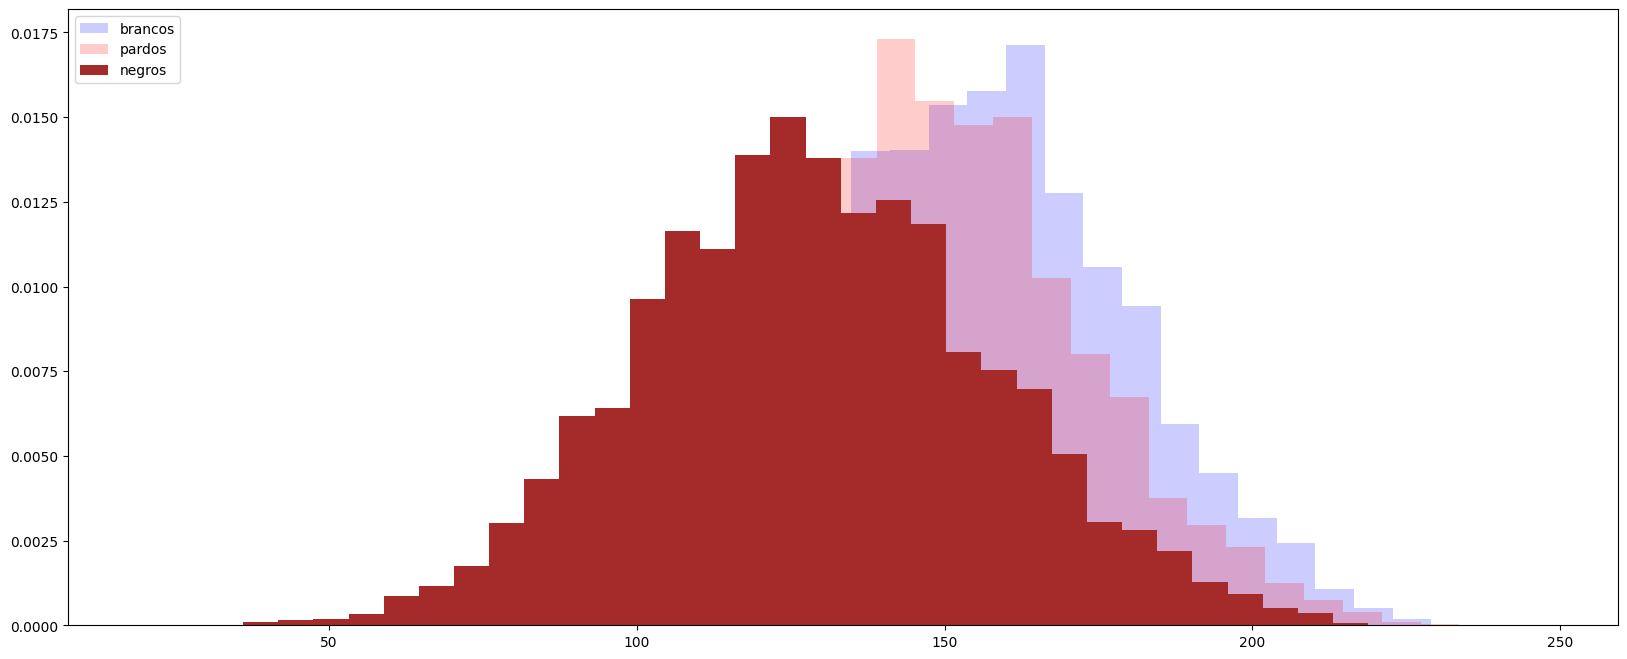

In [63]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(111)

ax1.hist(white_vec_intensities, bins=35, histtype="stepfilled", color="blue", label="brancos", density=True, alpha=0.2)
ax1.hist(mixed_vec_intensities, bins=35,  histtype="stepfilled", color="red", label="pardos", density=True, alpha=0.2)
ax1.hist(black_vec_intensities, bins=35, histtype="stepfilled", color="brown", label="negros", density=True, alpha=1)
plt.legend(loc="upper left")
plt.show()